In [1]:
import h5py
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from keras.models import *
from keras.layers import *
from keras.preprocessing.image import *
from keras.callbacks import *
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot, plot_model
import matplotlib.pyplot as plt

import os
np.random.seed(2018)


D:\ProgramData\Anaconda3\envs\tf36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Read feature：

In [5]:
h5_file = "feature_Xception.h5"

with h5py.File(h5_file, 'r') as h:
    X_train = np.array(h['train'])
    X_test = np.array(h['test'])
    y_train = np.array(h['label'])

X_train, y_train = shuffle(X_train, y_train)


In [3]:
print(X_train.shape)

(24929, 2048)


In [3]:
if os.path.exists('Xception_top_layers.h5'):
    input_tensor = Input(X_train.shape[1:])
    top_model = load_model('Xception_top_layers.h5')
    x = top_model(input_tensor)

    model = Model(input_tensor, x)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    total_acc = model.evaluate(X_train, y_train, batch_size=256, verbose=1)
    print(total_acc)

24929/24929 [==============================] - 1s 49us/step
[0.008222366773257656, 0.9982349873617231]


### Model adjustment:

In [6]:
model = Sequential()
model.add(BatchNormalization(axis=1, name='top_bn_1', input_shape=(2048,)))
model.add(Dropout(0.7))
model.add(Dense(1024, activation=None, name='top_fc_1'))
model.add(BatchNormalization(axis=1, name='top_bn_2'))
model.add(Activation('relu'))
model.add(Dropout(0.7))
model.add(Dense(1, activation='sigmoid', name='top_sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [10]:
input_tensor = Input(X_train.shape[1:])
x = input_tensor
x = BatchNormalization(axis=1, name='top_bn_1')(x)
x = Dropout(0.7)(x)
x = Dense(1024, activation=None, name='top_fc_1')(x)
x = BatchNormalization(axis=1, name='top_bn_2')(x)
x = Activation('relu')(x)
x = Dropout(0.7)(x)
x = Dense(1, activation='sigmoid', name='top_sigmoid')(x)

model = Model(input_tensor, x)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [7]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min'), 
             ModelCheckpoint(filepath='Xception_top_layers.h5', monitor='val_loss', verbose=0, save_best_only=True)]

history = model.fit(X_train, y_train, batch_size=256, epochs=20, validation_split=0.2, callbacks=callbacks)

Train on 19943 samples, validate on 4986 samples
Epoch 1/20
19943/19943 [==============================] - 2s 107us/step - loss: 0.0705 - acc: 0.9776 - val_loss: 0.0299 - val_acc: 0.9916
Epoch 2/20
19943/19943 [==============================] - 1s 51us/step - loss: 0.0432 - acc: 0.9864 - val_loss: 0.0255 - val_acc: 0.9924
Epoch 3/20
19943/19943 [==============================] - 1s 48us/step - loss: 0.0361 - acc: 0.9880 - val_loss: 0.0249 - val_acc: 0.9918
Epoch 4/20
19943/19943 [==============================] - 1s 45us/step - loss: 0.0315 - acc: 0.9884 - val_loss: 0.0241 - val_acc: 0.9938
Epoch 5/20
19943/19943 [==============================] - 1s 46us/step - loss: 0.0316 - acc: 0.9886 - val_loss: 0.0236 - val_acc: 0.9928
Epoch 6/20
19943/19943 [==============================] - 1s 52us/step - loss: 0.0287 - acc: 0.9892 - val_loss: 0.0231 - val_acc: 0.9928
Epoch 7/20
19943/19943 [==============================] - 1s 50us/step - loss: 0.0293 - acc: 0.9896 - val_loss: 0.0223 - val_acc

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


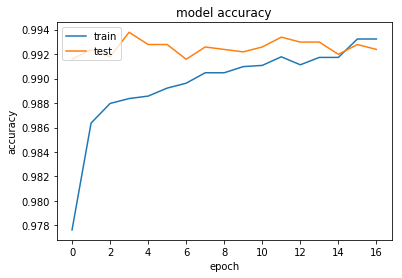

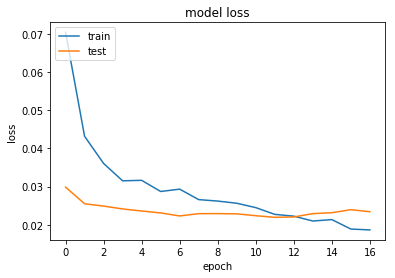

In [8]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Train in total training data:

In [9]:
model.fit(X_train, y_train, batch_size=256, epochs=10, validation_split=0)

Epoch 1/10
24929/24929 [==============================] - 1s 39us/step - loss: 0.0203 - acc: 0.9925
Epoch 2/10
24929/24929 [==============================] - 1s 38us/step - loss: 0.0212 - acc: 0.9921
Epoch 3/10
24929/24929 [==============================] - 1s 38us/step - loss: 0.0205 - acc: 0.9929
Epoch 4/10
24929/24929 [==============================] - 1s 37us/step - loss: 0.0202 - acc: 0.9927
Epoch 5/10
24929/24929 [==============================] - 1s 38us/step - loss: 0.0186 - acc: 0.9937
Epoch 6/10
24929/24929 [==============================] - 1s 38us/step - loss: 0.0182 - acc: 0.9937
Epoch 7/10
24929/24929 [==============================] - 1s 39us/step - loss: 0.0182 - acc: 0.9931
Epoch 8/10
24929/24929 [==============================] - 1s 38us/step - loss: 0.0166 - acc: 0.9945
Epoch 9/10
24929/24929 [==============================] - 1s 38us/step - loss: 0.0170 - acc: 0.9940
Epoch 10/10
24929/24929 [==============================] - 1s 37us/step - loss: 0.0158 - acc: 0.9939

In [10]:
if os.path.isfile('Xception_top_layers.h5'):
    os.remove('Xception_top_layers.h5')

model.save('Xception_top_layers.h5')
model.save_weights('Xception_top_layers_weights.h5')
# SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### Predict:

In [5]:
y_pred = model.predict(X_test, verbose=1)
y_pred = y_pred.clip(min=0.005, max=0.995)


12500/12500 [==============================] - 1s 55us/step


In [6]:
df = pd.read_csv("sampleSubmission.csv")

image_size = (229, 229)
gen = ImageDataGenerator()
test_generator = gen.flow_from_directory("test", image_size, shuffle=False, 
                                         batch_size=16, class_mode=None)

for i, fname in enumerate(test_generator.filenames):
    index = int(fname[fname.rfind('\\')+1:fname.rfind('.')])
    df.loc[index-1, ['label']] = y_pred[i]

df.to_csv('pred.csv', index=None)
df.head(10)

Found 12500 images belonging to 1 classes.


,id,label
0,1,0.98
1,2,0.98
2,3,0.98
3,4,0.98
4,5,0.02
5,6,0.02
6,7,0.02
7,8,0.02
8,9,0.02
9,10,0.02
